In [1]:
from IPython.display import clear_output

!wget -O event_log.csv https://www.dropbox.com/scl/fi/wdzan00h92fsil5q82dyh/ETEL.csv?rlkey=e4gh7gngxlsvgte35d7jgid2y&dl=1

clear_output()
print("Log loaded.")

Log loaded.


In [2]:
!pip install mpvis
!pip install pm4py

clear_output()
print("Packages installed.")

Packages installed.


In [3]:
import mpvis
from mpvis import mddrt
from mpvis import mpdfg
import pm4py
import pandas as pd
from datetime import datetime
from IPython.display import SVG, display
clear_output()

In [4]:
event_log = pd.read_csv('event_log.csv', sep = ';')

log_format = {'case:concept:name': 'Case ID',
              'concept:name': 'Activity',
              'time:timestamp': 'Complete Timestamp',
              'start_timestamp': 'Start Timestamp',
              'org:resource': 'ID_ALUMNO',
              'cost:total': ''}

event_log = mpvis.log_formatter(event_log.copy(), log_format)

In [5]:
print("Case count: " + str(len(set(event_log['case:concept:name']))))
print("Variant count: " + str(len(pm4py.stats.get_variants(event_log.copy()))))
print("Event count: " + str(len(event_log['case:concept:name'])))
print("Activity count: " + str(len(set(event_log['concept:name']))))

Case count: 11595
Variant count: 3935
Event count: 126658
Activity count: 8


In [6]:
mpdfg_discovery_start = datetime.now()

dfg, start_activities, end_activities = mpdfg.discover_multi_perspective_dfg(event_log.copy())

mpdfg_discovery_end = datetime.now()

print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 48.562454 seconds.


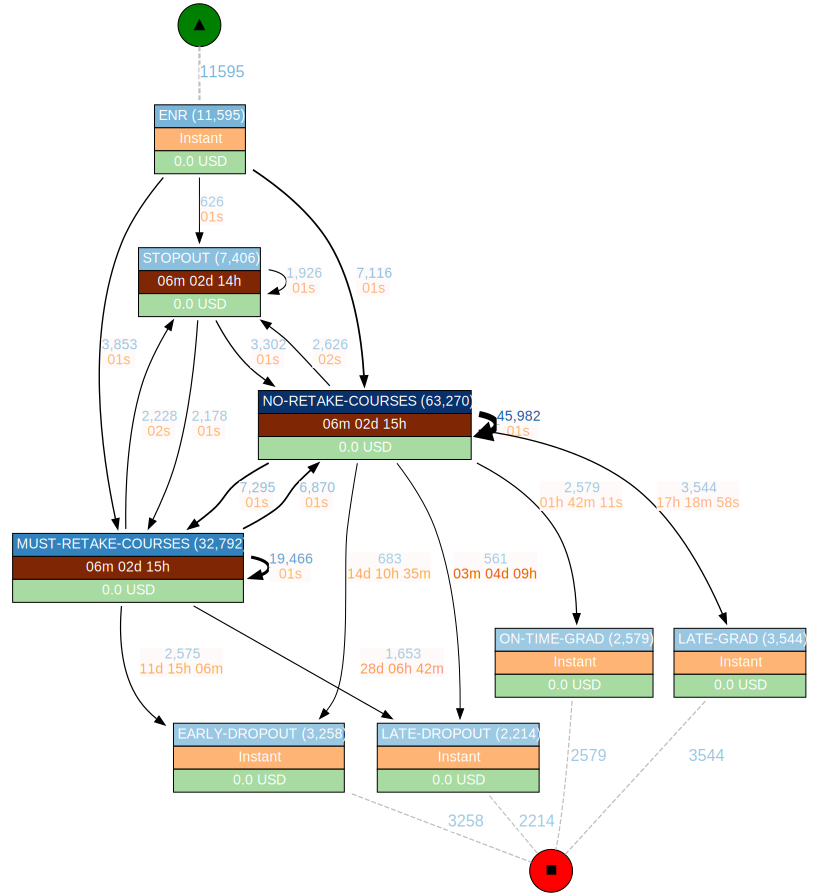

MP-DFG visualization time: 0.296474 seconds.


In [7]:
mpdfg_visualization_start = datetime.now()

mpdfg.view_multi_perspective_dfg(dfg, start_activities, end_activities)

mpdfg_visualization_end = datetime.now()

print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")

In [8]:
mddrt_discovery_start = datetime.now()

drt = mddrt.discover_multi_dimensional_drt(event_log.copy())

mddrt_discovery_end = datetime.now()

print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")

Calculating log mandatory activities: 


100%|██████████| 11595/11595 [02:32<00:00, 76.22it/s]


Calculating log metrics: 


100%|██████████| 11595/11595 [02:38<00:00, 73.33it/s]


Building Tree Cases:


100%|██████████| 11595/11595 [01:30<00:00, 128.63it/s]


Building Tree Graph:


100%|██████████| 11595/11595 [00:03<00:00, 3723.70it/s]


MD-DRT discovery time: 404.175438 seconds.


In [9]:
mddrt_visualization_start = datetime.now()

mddrt.view_multi_dimensional_drt(drt)

mddrt_visualization_end = datetime.now()

print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

Output hidden; open in https://colab.research.google.com to view.

In [10]:
print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")
print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")
print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")
print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 48.562454 seconds.
MP-DFG visualization time: 0.296474 seconds.
MD-DRT discovery time: 404.175438 seconds.
MD-DRT visualization time: 572.51826 seconds.


In [11]:
# A copy of the original log is used to allow comparing the processed and original logs
processed_log = event_log.copy()

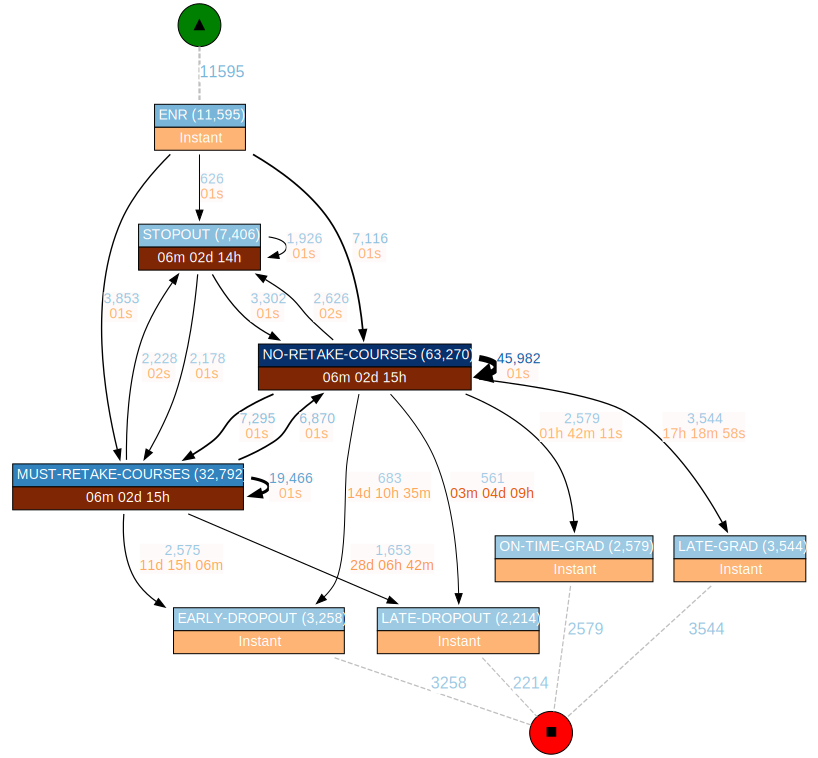

In [12]:
# Due to the simplicity of the DFG discovered for this event log, no processing is required to visualize the MP-DFG
# Since the event log has no cost information, the process model is generated again without visualizing the cost dimension
mpdfg.save_vis_multi_perspective_dfg(dfg, start_activities, end_activities, file_name = 'dfg_event_log_100_100', format = 'svg', visualize_cost = False)
display(SVG(filename = 'dfg_event_log_100_100.svg'))

In [13]:
# Since several variants of the process rarely occur (i.e., less than 3 times), only the 10% most common variants are considered
pruned_log = mpvis.preprocessing.prune_log_based_on_top_variants(processed_log.copy(), k = 394)

drt = mddrt.discover_multi_dimensional_drt(pruned_log.copy())

# Assuming an expected program duration of 12 months, only the first 14 events of every case are considered (until where 'ON-TIME-GRAD' should occur)
pruned_drt = mddrt.prune_tree_to_depth(drt, 14)

mddrt.save_vis_multi_dimensional_drt(pruned_drt, file_path = 'drt_processed_log_autogroup_10_variants_14_depth', visualize_cost = False)
display(SVG(filename = 'drt_processed_log_autogroup_10_variants_14_depth.svg'))

Output hidden; open in https://colab.research.google.com to view.